In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Objective - Based on AnnualIncome and SpendingScore, group customers into different clusters

In [21]:
df.shape

(200, 5)

In [5]:
df.columns = ['CID','Gender','Age','AnnInc','SScore']
df.head()

,CID,Gender,Age,AnnInc,SScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isnull().sum()

CID       0
Gender    0
Age       0
AnnInc    0
SScore    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
x = df.iloc[:,-2:]
x.head()

,AnnInc,SScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
x.describe()

,AnnInc,SScore
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


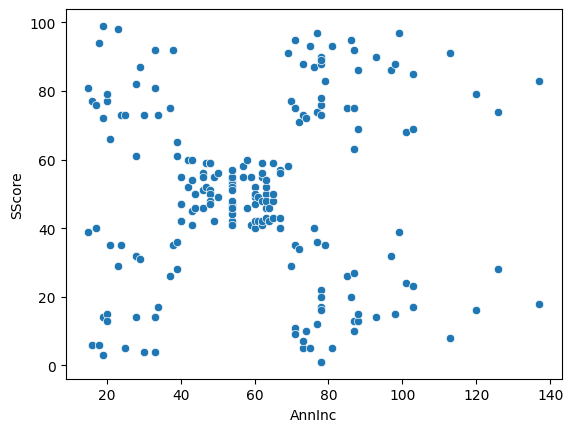

In [12]:
sns.scatterplot(data=x,x='AnnInc',y='SScore')
plt.show()

#### Elbow Method

In [13]:
from sklearn.cluster import KMeans

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# wcss = within cluster sum of squares
# As the num of clusters , wcss decreases

# model.inertia_ returns wcss

wcss = []
for i in range(1,21):    # i = 1,2,3....,20
    model = KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)
    
print('wcsss')
print(wcss)

wcsss
[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37239.835542456036, 30227.606513152015, 25011.920255473768, 21862.09267218289, 19657.783608703958, 17602.19046838677, 15810.343426539726, 14787.150352474277, 12746.969092182328, 11765.476042816834, 11609.449783549784, 10574.479354362113, 9556.037540478846, 8549.592769730269, 8098.932600732602]


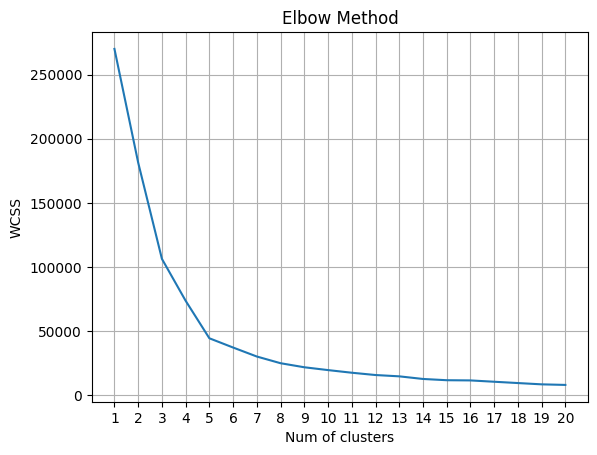

In [19]:
plt.plot(list(range(1,21)),wcss)
plt.xlabel('Num of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(list(range(1,21)))
plt.grid()
plt.show()

#### Inference
1) Optimal number of clusters = 5

#### Applying KMeans at K = 5

In [20]:
k5 = KMeans(n_clusters=5) # init='k-means++'
k5.fit(x)

KMeans(n_clusters=5)

#### Generate Predictions

In [23]:
ypred_k5 = k5.predict(x)
print(len(ypred_k5))

200


In [25]:
df['Cls5'] = ypred_k5
df['Cls5'].value_counts()

Cls5
3    81
2    39
1    35
4    23
0    22
Name: count, dtype: int64

#### Final Cluster centroids

In [34]:
print(k5.n_iter_)

7


In [26]:
# Final cluster centroid
cent5 = k5.cluster_centers_
print(cent5)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


In [ ]:
# C0 - 25.72727273,  79.36363636 -  Low AnnInc and High SScore
# C1 - 88.2,         17.11428571 - High AnnInc and Low SScore
# C2 - 86.53846154, 82.12820513 -  High AnnInc and High SScore
# C3 - 55.2962963  49.51851852 -   Medium AnnInc and Medium SScore
# C4 - 26.30434783 20.91304348 -   Low AnnInc and Low SScore

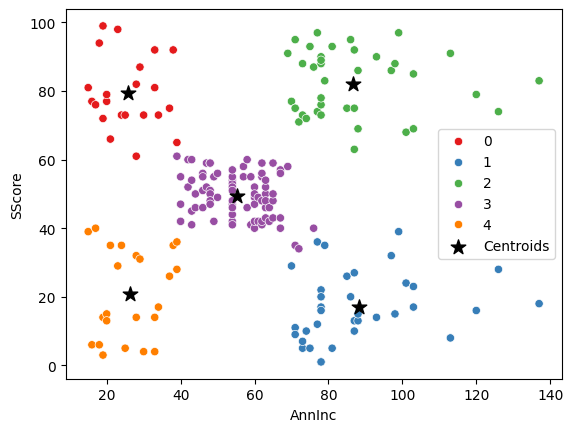

In [29]:
sns.scatterplot(data=df,x='AnnInc',y='SScore',hue='Cls5',palette='Set1')
plt.scatter(cent5[:,0],cent5[:,1],label='Centroids',marker='*',s=120,
            color='black')
plt.legend()
plt.show()

In [30]:
df.head()

,CID,Gender,Age,AnnInc,SScore,Cls5
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
